<a href="https://colab.research.google.com/github/joaoflauzino/cafe_c_codigo_01/blob/main/cafe_c_codigo_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [176]:
!pip install pyspark

# Bibliotecas

In [177]:
from google.colab import drive
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.types import *
import seaborn as sns
import matplotlib.pyplot as plt

In [178]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Criando sessão no spark

In [179]:
## Criando sessão
spark = SparkSession.builder.appName("NBO").getOrCreate()

# Leitura de dados

In [180]:
## Leitura de csv 
df = spark.read.csv('/content/drive/My Drive/Datasets/marketing_campaign.csv', sep = ";", header=True)

# Informações sobre a base de dados

- AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 - otherwise
- AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
- Complain - 1 if customer complained in the last 2 years
- DtCustomer - date of customer’s enrolment with the company
- Education - customer’s level of education
- Marital - customer’s marital status
- Kidhome - number of small children in customer’s household
- Teenhome - number of teenagers in customer’s household
- Income - customer’s yearly household income
- MntFishProducts - amount spent on fish products in the last 2 years
- MntMeatProducts - amount spent on meat products in the last 2 years
- MntFruits - amount spent on fruits products in the last 2 years
- MntSweetProducts - amount spent on sweet products in the last 2 years
- MntWines - amount spent on wine products in the last 2 years
- MntGoldProds - amount spent on gold products in the last 2 years
- NumDealsPurchases - number of purchases made with discount
- NumCatalogPurchases - number of purchases made using catalogue
- NumStorePurchases - number of purchases made directly in stores
- NumWebPurchases - number of purchases made through company’s web site
- NumWebVisitsMonth - number of visits to company’s web site in the last month
- Recency - number of days since the last purchase

# Perguntas sobre o negócio

- Daqueles que são propensos a aceitar o produto, qual o nível de graduação mais presente? O nível de graduação difere daqueles que aceitam ou não uma oferta?

- Daqueles que são propensos a aceitar o produto, qual o Estado Civil mais presente? O Estado Civil difere daqueles que aceitam ou não uma oferta?

- Quanto mais recente, maior a chance dele aceitar a oferta?

- Quanto maior a renda, maior a chance dele aceitar a oferta?

- Existe alguma correlação entre renda e recência?

- Pessoas mais velhas tendem a aceitar/recusar as ofertas? (criar campo com idade em anos)

- A plataforma que o produto é oferecido impacta na aceitação das ofertas?

- O número de crianças impacta na aceitação de ofertas?

- O número de adolescentes impacta na aceitação de ofertas?
- As campanhas são cumulativas ou independentes? Se for cumulativas, esses clientes reclamaram alguma vez nos últimos 2 anos?

- Clientes mais antigos tendem a aceitar as ofertas? (criar campo com idade em anos)

- Visitas no site da empresa tem correlação com a aceita/recusa das ofertas?

- O número de compras realizada com desconto tem correlação com a aceita/recusa das ofertas?

- A quantia gasta em produtos do tipo GOLD nos últimos 2 anos tem correlação em aceitar/recusar as ofertas?

- Os clientes estão propensos de aceitar as ofertas em qual nível da campanha (1ª a 5ª)?

- Nossas variaveis possuem distribuicao normal?

- Existem outliers no nosso conjunto de dados?


In [181]:
df.show(1, vertical = True)

-RECORD 0-------------------------
 ID                  | 5524       
 Year_Birth          | 1957       
 Education           | Graduation 
 Marital_Status      | Single     
 Income              | 58138      
 Kidhome             | 0          
 Teenhome            | 0          
 Dt_Customer         | 2012-09-04 
 Recency             | 58         
 MntWines            | 635        
 MntFruits           | 88         
 MntMeatProducts     | 546        
 MntFishProducts     | 172        
 MntSweetProducts    | 88         
 MntGoldProds        | 88         
 NumDealsPurchases   | 3          
 NumWebPurchases     | 8          
 NumCatalogPurchases | 10         
 NumStorePurchases   | 4          
 NumWebVisitsMonth   | 7          
 AcceptedCmp3        | 0          
 AcceptedCmp4        | 0          
 AcceptedCmp5        | 0          
 AcceptedCmp1        | 0          
 AcceptedCmp2        | 0          
 Complain            | 0          
 Z_CostContact       | 3          
 Z_Revenue          

# Tratamento da base

In [182]:
df.count()

2240

# Verificar valores nulos

In [183]:
df.select(*(F.sum(F.col(c).isNull().cast("int")).alias(c) for c in df.columns)).show(vertical = True)

-RECORD 0------------------
 ID                  | 0   
 Year_Birth          | 0   
 Education           | 0   
 Marital_Status      | 0   
 Income              | 24  
 Kidhome             | 0   
 Teenhome            | 0   
 Dt_Customer         | 0   
 Recency             | 0   
 MntWines            | 0   
 MntFruits           | 0   
 MntMeatProducts     | 0   
 MntFishProducts     | 0   
 MntSweetProducts    | 0   
 MntGoldProds        | 0   
 NumDealsPurchases   | 0   
 NumWebPurchases     | 0   
 NumCatalogPurchases | 0   
 NumStorePurchases   | 0   
 NumWebVisitsMonth   | 0   
 AcceptedCmp3        | 0   
 AcceptedCmp4        | 0   
 AcceptedCmp5        | 0   
 AcceptedCmp1        | 0   
 AcceptedCmp2        | 0   
 Complain            | 0   
 Z_CostContact       | 0   
 Z_Revenue           | 0   
 Response            | 0   



- Como são apenas 24 registros e existe um desvio padrão bastante significativo, a abordagem escolhida será excluir esses registros do dataset.

In [184]:
df.select('Income').summary().show(vertical = True)

-RECORD 0---------------------
 summary | count              
 Income  | 2216               
-RECORD 1---------------------
 summary | mean               
 Income  | 52247.25135379061  
-RECORD 2---------------------
 summary | stddev             
 Income  | 25173.076660901414 
-RECORD 3---------------------
 summary | min                
 Income  | 101970             
-RECORD 4---------------------
 summary | 25%                
 Income  | 35246.0            
-RECORD 5---------------------
 summary | 50%                
 Income  | 51373.0            
-RECORD 6---------------------
 summary | 75%                
 Income  | 68487.0            
-RECORD 7---------------------
 summary | max                
 Income  | 98777              



In [185]:
df = df.na.drop()

In [186]:
df.count()

2216

# Análise Exploratória

1. Daqueles que são propensos a aceitar o produto, qual o nível de graduação mais presente? O nível de graduação difere daqueles que aceitam ou não uma oferta?

In [187]:
df.select('AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response').groupBy('Response').count().show()

+--------+-----+
|Response|count|
+--------+-----+
|       0| 1883|
|       1|  333|
+--------+-----+



In [188]:
df.filter( (df.AcceptedCmp1 == 0)  &  (df.AcceptedCmp2 == 0) & (df.AcceptedCmp3 == 0) & (df.AcceptedCmp4 == 0) & (df.AcceptedCmp5 == 0) & (df.Response == 1) ).count()

146

* Vamos criar nossa própria target, já que não estamos vendo muito sentido na coluna Response

In [189]:
df = df.withColumn('Target', 
                        F.when(
                            (df.AcceptedCmp1 > 0) | (df.AcceptedCmp2 > 0) | (df.AcceptedCmp3 > 0) | (df.AcceptedCmp4 > 0) | (df.AcceptedCmp5 > 0) , 1
                        ).otherwise(0)
                   )

In [190]:
df.filter(df.Target == 1).select('AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Target').show()

+------------+------------+------------+------------+------------+------+
|AcceptedCmp1|AcceptedCmp2|AcceptedCmp3|AcceptedCmp4|AcceptedCmp5|Target|
+------------+------------+------------+------------+------------+------+
|           0|           0|           1|           0|           0|     1|
|           1|           0|           0|           0|           1|     1|
|           1|           0|           0|           0|           0|     1|
|           0|           0|           0|           1|           0|     1|
|           0|           0|           0|           0|           1|     1|
|           0|           0|           0|           1|           0|     1|
|           0|           0|           1|           0|           0|     1|
|           1|           0|           1|           0|           0|     1|
|           0|           0|           0|           0|           1|     1|
|           0|           0|           0|           1|           1|     1|
|           1|           0|           

In [191]:
df.groupBy('Target').count().show()

+------+-----+
|Target|count|
+------+-----+
|     1|  459|
|     0| 1757|
+------+-----+



In [192]:
df_1_hipotese = df.groupBy('Education', 'Target').count().toPandas()

In [193]:
df_1_hipotese.head()

,Education,Target,count
0,Basic,1,6
1,2n Cycle,0,163
2,Master,0,291
3,Graduation,1,228
4,Basic,0,48


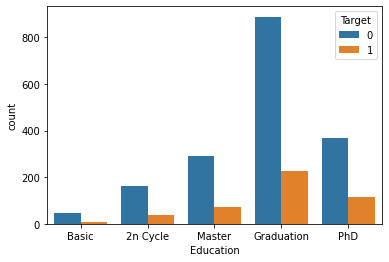

In [194]:
plt.figure()

sns.barplot(data = df_1_hipotese, x = 'Education', y = 'count', hue = 'Target')

- A priori, não existe nenhuma divergência significativa (variável Education) na proporção daqueles que aceitaram ou recusaram uma oferta


2. Daqueles que são propensos a aceitar o produto, qual o Estado Civil mais presente? O Estado Civil difere daqueles que aceitam ou não uma oferta?

In [195]:
df_2_hipotese = df.groupBy('Marital_Status', 'Target').count().toPandas()

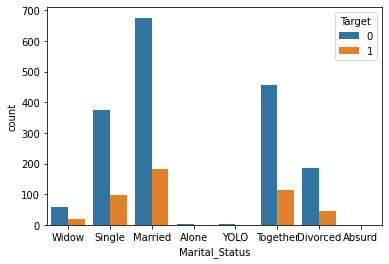

In [196]:
sns.barplot(data = df_2_hipotese, x = 'Marital_Status', y = 'count', hue = 'Target')

- O Estado Civil também aparenta não conter uma diferença significativa para distinguir quem aceita ou recusa uma oferta

3. Quanto mais recente, maior a chance dele aceitar a oferta?

In [197]:
df = df.withColumn('Age_Company', 
        F.floor(
             F.datediff(F.current_date(), F.to_date(F.col('Dt_Customer'), 'yyyy-mm-dd')))
              )

In [198]:
df.select( F.max(F.col('Dt_Customer')), F.min(F.col('Dt_Customer')) ).show()

+----------------+----------------+
|max(Dt_Customer)|min(Dt_Customer)|
+----------------+----------------+
|      2014-06-29|      2012-07-30|
+----------------+----------------+



In [199]:
df.agg({"Age_Company": "max"}).show()

+----------------+
|max(Age_Company)|
+----------------+
|            3425|
+----------------+



In [200]:
df.agg({"Age_Company": "min"}).show()

+----------------+
|min(Age_Company)|
+----------------+
|            2664|
+----------------+



In [201]:
intervalo = (3424-2663)/3

In [202]:
df = df.withColumn('Faixas', F.when(df.Age_Company <= 2663 + intervalo, "A") \
                         .when( (df.Age_Company > 2663 + intervalo) & (df.Age_Company <= 2663 + (intervalo*2)), "B") \
                         .otherwise("C")
              )

In [203]:
soma_B = df.groupBy('Faixas', 'Target').count().groupBy('Faixas').agg({'count': 'sum'}).collect()[0][1]
soma_C = df.groupBy('Faixas', 'Target').count().groupBy('Faixas').agg({'count': 'sum'}).collect()[1][1]
soma_A = df.groupBy('Faixas', 'Target').count().groupBy('Faixas').agg({'count': 'sum'}).collect()[2][1]

In [204]:
df_faixas = df.groupBy('Faixas', 'Target').count() \
                              .withColumn('SOMA_B', F.lit(soma_B)) \
                              .withColumn('SOMA_C', F.lit(soma_C)) \
                              .withColumn('SOMA_A', F.lit(soma_A)) \
                              .withColumn('PCT', 
                                          
                                          F.when(df.Faixas == 'A', (F.col('count') / F.col('SOMA_A')) * 100 ) \
                                           .when(df.Faixas == 'B', (F.col('count') / F.col('SOMA_B')) * 100 ) \
                                           .when(df.Faixas == 'C', (F.col('count') / F.col('SOMA_C')) * 100 ) 
                                          
                                          ).orderBy(F.col('Faixas').asc()).toPandas()

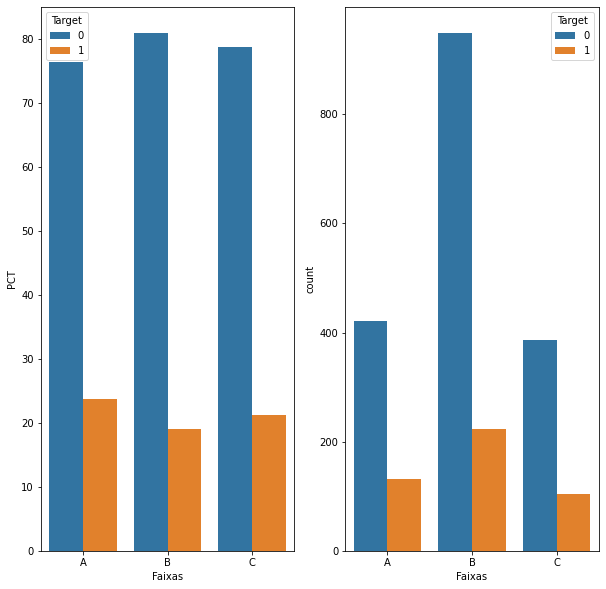

In [205]:
fig, axs = plt.subplots(ncols=2, figsize = (10,10))

sns.barplot(data = df_faixas, x = 'Faixas', y = 'PCT', hue = 'Target', ax = axs[0])
sns.barplot(data = df_faixas, x = 'Faixas', y = 'count', hue = 'Target', ax = axs[1])

plt.show()

- A classe A apresenta uma proporção de aceitação maior do que B (cerca de 20%). Já a classe C apresneta uma aceitação maior do que B (cerca de 10%)

4- Quanto maior a renda, maior a chance dele aceitar a oferta?

In [206]:
df.select(F.col('Income').cast(FloatType())).describe().show()

+-------+------------------+
|summary|            Income|
+-------+------------------+
|  count|              2216|
|   mean| 52247.25135379061|
| stddev|25173.076660901414|
|    min|            1730.0|
|    max|          666666.0|
+-------+------------------+



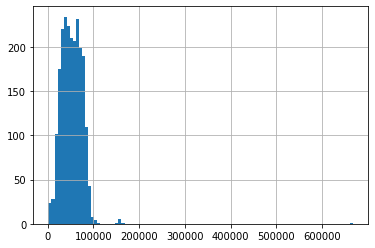

In [209]:
df.select('Income').toPandas()['Income'].astype(float).hist(bins = 100)

In [210]:
media = df.agg({"Income": "mean"}).collect()[0][0]
desvio = df.agg({"Income": "stddev"}).collect()[0][0]

In [211]:
df = df.withColumn('Media', F.lit(media)) \
       .withColumn('Desvio', F.lit(desvio))

In [212]:
df = df.withColumn('Outlier', F.when(df.Income > df.Media + 2 * df.Desvio, 1) \
                          .when(df.Income < df.Media - 2 * df.Desvio, 1) \
                          .otherwise(0)
              )

In [258]:
df_sem_outlier = df.filter(df.Outlier == 0)

In [259]:
df_sem_outlier.show(1)

+----+----------+----------+--------------+------+-------+--------+-----------+-------+--------+---------+---------------+---------------+----------------+------------+-----------------+---------------+-------------------+-----------------+-----------------+------------+------------+------------+------------+------------+--------+-------------+---------+--------+------+-----------+------+-----------------+------------------+-------+-------------+
|  ID|Year_Birth| Education|Marital_Status|Income|Kidhome|Teenhome|Dt_Customer|Recency|MntWines|MntFruits|MntMeatProducts|MntFishProducts|MntSweetProducts|MntGoldProds|NumDealsPurchases|NumWebPurchases|NumCatalogPurchases|NumStorePurchases|NumWebVisitsMonth|AcceptedCmp3|AcceptedCmp4|AcceptedCmp5|AcceptedCmp1|AcceptedCmp2|Complain|Z_CostContact|Z_Revenue|Response|Target|Age_Company|Faixas|            Media|            Desvio|Outlier|Faixas_Income|
+----+----------+----------+--------------+------+-------+--------+-----------+-------+--------+--

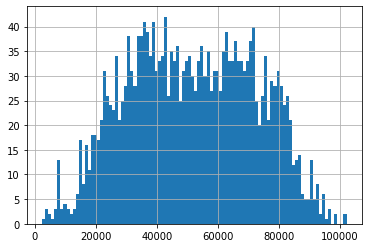

In [260]:
df_sem_outlier.select('Income').toPandas()['Income'].astype(float).hist(bins = 100)

In [261]:
df_sem_outlier.select(F.col('Income').cast(FloatType())).describe().show()

+-------+------------------+
|summary|            Income|
+-------+------------------+
|  count|              2204|
|   mean| 51580.51088929219|
| stddev|20601.944399868164|
|    min|            2447.0|
|    max|          102160.0|
+-------+------------------+



In [268]:
df_sem_outlier = df_sem_outlier.select('*', F.col('Income').cast(FloatType()).alias('Income_cast')).drop('Income').withColumnRenamed('Income_cast', 'Income')

In [255]:
intervalo = (102160 - 2447) / 5

In [266]:
intervalo

19942.6

In [275]:
df_sem_outlier = df_sem_outlier.withColumn('Faixas_Income', F.when(df_sem_outlier.Income <= (2447 + intervalo), "A") \
                         .when( (df_sem_outlier.Income > (2447 + intervalo)) & (df_sem_outlier.Income <= (2447 + (intervalo*2))), "B") \
                         .when( (df_sem_outlier.Income > (2447 + (intervalo*2))) & (df_sem_outlier.Income <= (2447 + (intervalo*3))), "C") \
                         .when( (df_sem_outlier.Income > (2447 + (intervalo*3))) & (df_sem_outlier.Income <= (2447 + (intervalo*4))), "D") \
                         .otherwise("E")
              )

In [276]:
df_sem_outlier.groupBy('Faixas_Income').count().show()

+-------------+-----+
|Faixas_Income|count|
+-------------+-----+
|            E|  144|
|            B|  638|
|            D|  615|
|            C|  637|
|            A|  170|
+-------------+-----+



# Modelagem

# Avaliação do modelo